In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import os
import pandas as pd



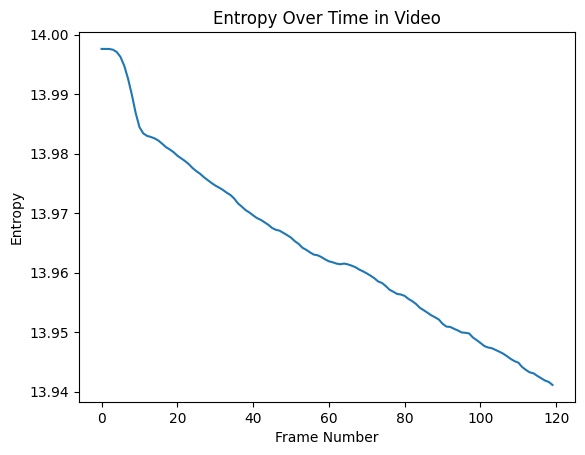

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_grid_entropy(image, grid_size=(128, 128)):
    height, width = image.shape[:2]
    cell_height, cell_width = height // grid_size[0], width // grid_size[1]
    entropy_values = []

    for i in range(0, height, cell_height):
        for j in range(0, width, cell_width):
            cell = image[i:i+cell_height, j:j+cell_width]
            mean_intensity = np.mean(cell)
            entropy_values.append(mean_intensity)

    entropy_values = np.array(entropy_values)
    entropy_values /= entropy_values.sum()
    entropy = -np.sum(entropy_values * np.log2(entropy_values + np.finfo(float).eps))
    return entropy

# Replace 'path_to_your_video.mp4' with your video file path
video_path = '/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_1/entropy/145_2.avi'
cap = cv2.VideoCapture(video_path)

entropy_over_time = []
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale if your video is in color
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    entropy = calculate_grid_entropy(gray_frame)
    entropy_over_time.append(entropy)
    frame_count += 1

cap.release()

# Plotting the entropy over time
plt.plot(range(frame_count), entropy_over_time)
plt.xlabel('Frame Number')
plt.ylabel('Entropy')
plt.title('Entropy Over Time in Video')
plt.show()


In [6]:
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)

    entropy_over_time = []
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        entropy = calculate_grid_entropy(gray_frame)
        entropy_over_time.append(entropy)
        frame_count += 1

    cap.release()
    return entropy_over_time, frame_count

In [7]:
folder_path = '/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_1/entropy'


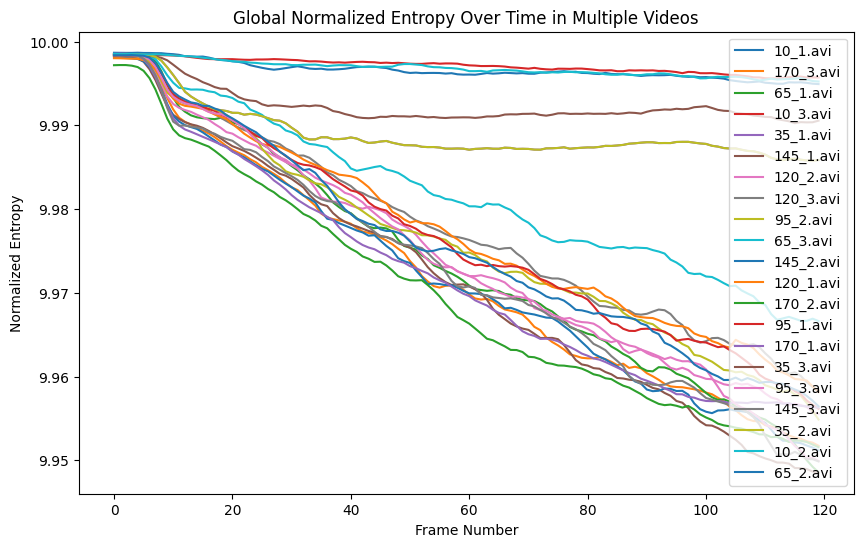

In [8]:
video_files = [f for f in os.listdir(folder_path) if f.endswith('.avi')]

all_entropies = []
video_data = {}

for video_file in video_files:
    video_path = os.path.join(folder_path, video_file)
    entropy_over_time, frame_count = process_video(video_path)
    video_data[video_file] = (entropy_over_time, frame_count)
    all_entropies.extend(entropy_over_time)

# Global Normalization
min_entropy = min(all_entropies)
max_entropy = max(all_entropies)

plt.figure(figsize=(10, 6))

for video_file, (entropy_over_time, frame_count) in video_data.items():
    normalized_entropy = [(e - min_entropy) / (max_entropy - min_entropy) for e in entropy_over_time]
    plt.plot(range(frame_count), entropy_over_time, label=video_file)

plt.xlabel('Frame Number')
plt.ylabel('Normalized Entropy')
plt.title('Global Normalized Entropy Over Time in Multiple Videos')
plt.legend()
plt.show()

Sum of normalized values (should be close to 1): 1.0
Sum of normalized values (should be close to 1): 1.0
Sum of normalized values (should be close to 1): 1.0
Sum of normalized values (should be close to 1): 1.0
Sum of normalized values (should be close to 1): 1.0
Sum of normalized values (should be close to 1): 1.0
Sum of normalized values (should be close to 1): 1.0
Sum of normalized values (should be close to 1): 0.9999999999999998
Sum of normalized values (should be close to 1): 1.0
Sum of normalized values (should be close to 1): 1.0
Sum of normalized values (should be close to 1): 0.9999999999999999
Sum of normalized values (should be close to 1): 1.0
Sum of normalized values (should be close to 1): 1.0
Sum of normalized values (should be close to 1): 1.0
Sum of normalized values (should be close to 1): 0.9999999999999999
Sum of normalized values (should be close to 1): 1.0
Sum of normalized values (should be close to 1): 1.0000000000000002
Sum of normalized values (should be clo

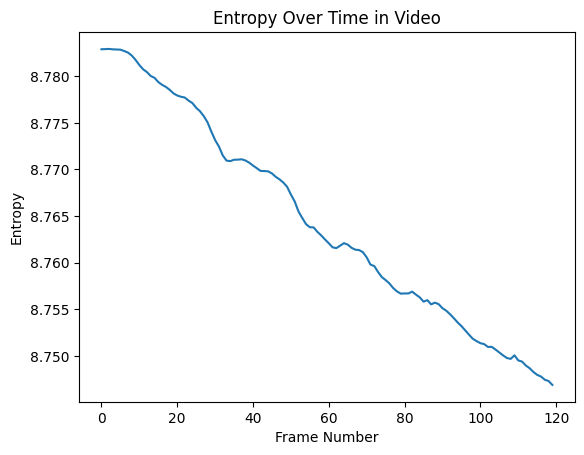

Theoretical Maximum Entropy: 8.643856189774725


In [33]:
def calculate_grid_entropy(image, grid_size=(20, 20)):  # Adjusted grid size to 20x20 for 400 cells
    height, width = image.shape[:2]
    cell_height, cell_width = height // grid_size[0], width // grid_size[1]
    entropy_values = []

    for i in range(0, height, cell_height):
        for j in range(0, width, cell_width):
            cell = image[i:i+cell_height, j:j+cell_width]
            mean_intensity = np.mean(cell)
            entropy_values.append(mean_intensity)

    entropy_values = np.array(entropy_values)
    entropy_values /= entropy_values.sum()

    # Sanity check for normalization
    print(f"Sum of normalized values (should be close to 1): {entropy_values.sum()}")

    entropy = -np.sum(entropy_values * np.log2(entropy_values))# + np.finfo(float).eps))
    return entropy

# Replace 'path_to_your_video.mp4' with your video file path
video_path = '/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_1/entropy/170_3.avi'
cap = cv2.VideoCapture(video_path)

entropy_over_time = []
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale if your video is in color
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    entropy = calculate_grid_entropy(gray_frame)
    entropy_over_time.append(entropy)
    frame_count += 1

cap.release()

# Plotting the entropy over time
plt.plot(range(frame_count), entropy_over_time)
plt.xlabel('Frame Number')
plt.ylabel('Entropy')
plt.title('Entropy Over Time in Video')
plt.show()

# Compare with theoretical maximum entropy
max_theoretical_entropy = np.log2(400)  # For 400 cells
print(f"Theoretical Maximum Entropy: {max_theoretical_entropy}")


In [16]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale if your video is in color
    start_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

cap.release()

In [19]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale if your video is in color
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    video_frames.append(gray_frame)
    entropy = calculate_grid_entropy(gray_frame)
    entropy_over_time.append(entropy)
    frame_count += 1

cap.release()

In [21]:
import cv2

# Initialize the list to hold the frames
video_frames = []

# Load your video
video_path = '/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_1/entropy/145_2.avi'  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale if your video is in color
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Append the frame to the list
    video_frames.append(gray_frame)

cap.release()

# Now 'video_frames' contains all the frames of the video in grayscale


In [22]:
video_frames

[array([[ 71,  71,  95, ...,  70,  77,  67],
        [ 67,  79,  86, ...,  82,  86,  71],
        [ 78,  84,  86, ...,  82,  91,  80],
        ...,
        [101,  97,  96, ...,  94,  92,  90],
        [ 97, 102,  91, ...,  93,  91,  90],
        [ 82,  94,  78, ...,  81,  82,  83]], dtype=uint8),
 array([[ 61,  74,  74, ...,  78,  70,  75],
        [ 67,  91,  89, ...,  84,  67,  59],
        [ 73,  93,  90, ...,  82,  83,  79],
        ...,
        [ 83,  92,  99, ...,  96,  98,  99],
        [ 78,  90,  99, ...,  94,  90,  87],
        [ 76,  90, 101, ...,  92,  87,  82]], dtype=uint8),
 array([[ 75,  69,  73, ...,  81,  85,  85],
        [ 88,  80,  77, ...,  87,  83,  83],
        [ 79,  81,  84, ...,  79,  74,  75],
        ...,
        [ 97, 114, 102, ...,  91,  87,  88],
        [ 91, 106,  93, ...,  94,  85,  78],
        [ 83,  94,  83, ...,  90,  84,  70]], dtype=uint8),
 array([[ 75,  86,  79, ...,  75,  75,  91],
        [ 83,  89,  93, ...,  86,  80,  84],
        [ 82,  8

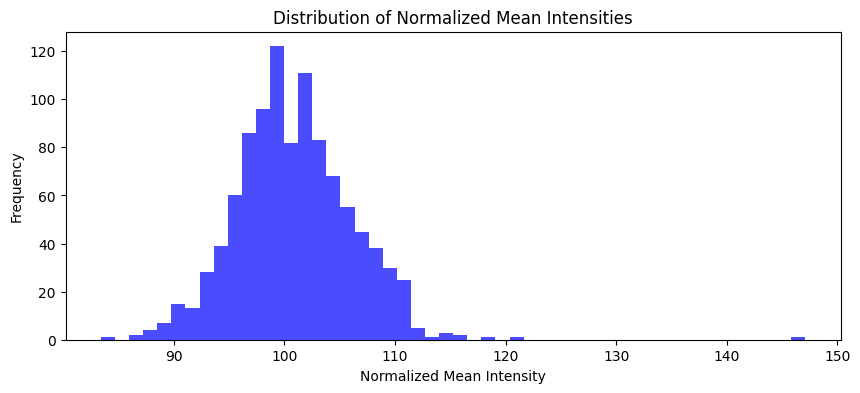

Calculated Entropy: 9.998049202079075


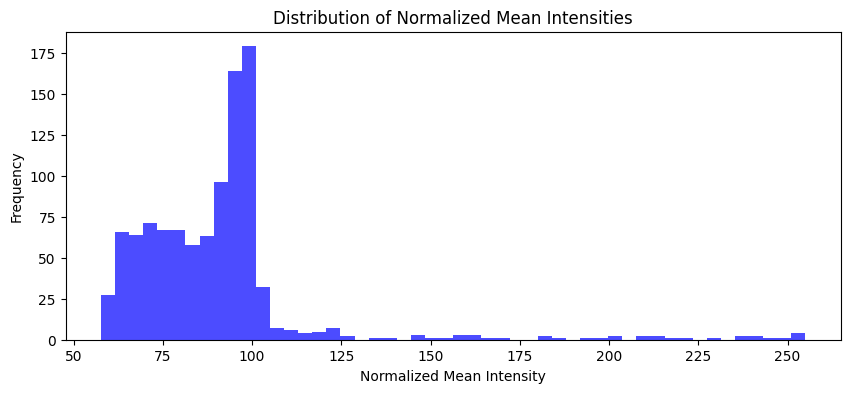

Calculated Entropy: 9.951165211490332
Theoretical Maximum Entropy: 8.643856189774725


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_grid_entropy(image, grid_size=(32, 32), plot_distribution=False):
    height, width = image.shape[:2]
    cell_height, cell_width = height // grid_size[0], width // grid_size[1]
    entropy_values = []

    for i in range(0, height, cell_height):
        for j in range(0, width, cell_width):
            cell = image[i:i+cell_height, j:j+cell_width]
            mean_intensity = np.mean(cell)
            entropy_values.append(mean_intensity)

    entropy_values = np.array(entropy_values)

    if plot_distribution:
        plt.figure(figsize=(10, 4))
        plt.hist(entropy_values, bins=50, color='blue', alpha=0.7)
        plt.title('Distribution of Normalized Mean Intensities')
        plt.xlabel('Normalized Mean Intensity')
        plt.ylabel('Frequency')
        plt.show()

    entropy_values /= entropy_values.sum()
    entropy = -np.sum(entropy_values * np.log2(entropy_values + np.finfo(float).eps))
    return entropy


image = gray_frame

# Calculate entropy and plot the distribution of mean intensities
entropy = calculate_grid_entropy(video_frames[0], plot_distribution=True)
print(f"Calculated Entropy: {entropy}")
entropy = calculate_grid_entropy(video_frames[119], plot_distribution=True)
print(f"Calculated Entropy: {entropy}")
# Theoretical maximum entropy
max_theoretical_entropy = np.log2(400)  # For 400 cells
print(f"Theoretical Maximum Entropy: {max_theoretical_entropy}")


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_grid_entropy(image, grid_size=(128, 128), plot_distribution=False):
    height, width = image.shape[:2]
    cell_height, cell_width = height // grid_size[0], width // grid_size[1]
    entropy_values = []

    for i in range(0, height, cell_height):
        for j in range(0, width, cell_width):
            cell = image[i:i+cell_height, j:j+cell_width]
            mean_intensity = np.mean(cell)
            entropy_values.append(mean_intensity)

    entropy_values = np.array(entropy_values)

    if plot_distribution:
        plt.figure(figsize=(10, 4))
        plt.hist(entropy_values, bins=50, color='blue', alpha=0.7)
        plt.title('Distribution of Normalized Mean Intensities')
        plt.xlabel('Normalized Mean Intensity')
        plt.ylabel('Frequency')
        plt.show()

    entropy_values /= entropy_values.sum()
    entropy = -np.sum(entropy_values * np.log2(entropy_values + np.finfo(float).eps))
    return entropy


image = start_frame

# Calculate entropy and plot the distribution of mean intensities
entropy = calculate_grid_entropy(image, plot_distribution=True)
print(f"Calculated Entropy: {entropy}")

# Theoretical maximum entropy
max_theoretical_entropy = np.log2(400)  # For 400 cells
print(f"Theoretical Maximum Entropy: {max_theoretical_entropy}")


NameError: name 'start_frame' is not defined

In [22]:
entropy = calculate_grid_entropy(test_image)
print(f"Calculated Entropy: {entropy}")

Calculated Entropy: 8.6438561897746


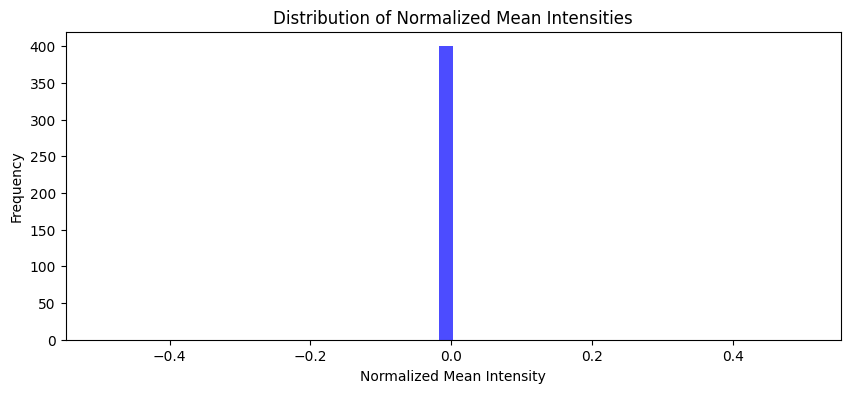

Calculated Entropy: 8.6438561897746


In [23]:
# Calculate entropy and plot the distribution of mean intensities
entropy = calculate_grid_entropy(test_image, plot_distribution=True)
print(f"Calculated Entropy: {entropy}")


In [4]:
def calculate_grid_entropy(image, grid_size=(32, 32)):  # Adjusted grid size to 20x20 for 400 cells
    height, width = image.shape[:2]
    cell_height, cell_width = height // grid_size[0], width // grid_size[1]
    entropy_values = []

    for i in range(0, height, cell_height):
        for j in range(0, width, cell_width):
            cell = image[i:i+cell_height, j:j+cell_width]
            mean_intensity = np.mean(cell)
            entropy_values.append(mean_intensity)

    entropy_values = np.array(entropy_values)
    entropy_values /= entropy_values.sum()

    # Sanity check for normalization
    print(f"Sum of normalized values (should be close to 1): {entropy_values.sum()}")

    entropy = -np.sum(entropy_values * np.log2(entropy_values + np.finfo(float).eps))
    return entropy

# Create a test image (uniform gray)
test_image = np.full((2048, 2048), 128, dtype=np.uint8)  # 200x200 image with a gray level of 128

# Calculate entropy for the test image
entropy = calculate_grid_entropy(test_image)
print(f"Calculated Entropy: {entropy}")

# Compare with theoretical maximum entropy
max_theoretical_entropy = np.log2(32*32)  # For 400 cells
print(f"Theoretical Maximum Entropy: {max_theoretical_entropy}")



Sum of normalized values (should be close to 1): 1.0
Calculated Entropy: 9.99999999999967
Theoretical Maximum Entropy: 10.0


In [32]:
test_image_single_pixel = np.zeros((200, 200), dtype=np.uint8)
test_image_single_pixel[0, 0] = 1


calculate_grid_entropy(test_image_single_pixel)

Sum of normalized values (should be close to 1): 1.0


-3.203426503814917e-16

In [24]:
import pims


In [26]:
frames = pims.ImageSequence('/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_2/stokes/1120/mid_pH_test_125min_1/Pos2/*.tif')


In [41]:
# only want the bf frame
bf_frames = frames[::3]
bf_frames[1]
len(bf_frames)

175

Frame([[258, 239, 252, ..., 244, 222, 239],
       [223, 271, 255, ..., 255, 275, 210],
       [274, 237, 273, ..., 265, 274, 257],
       ...,
       [232, 208, 211, ..., 265, 248, 264],
       [225, 229, 218, ..., 230, 302, 254],
       [185, 203, 219, ..., 237, 256, 249]], dtype=uint16)
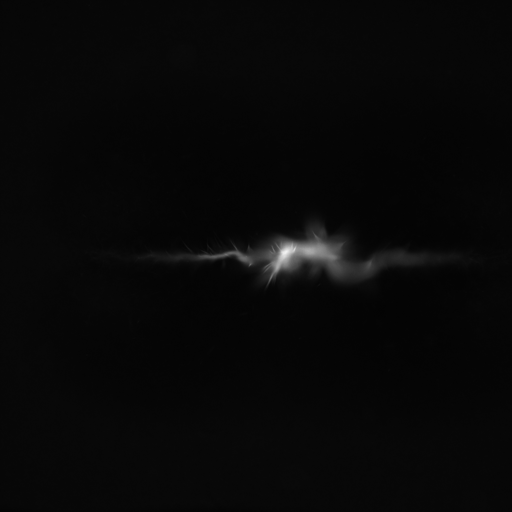

In [48]:
# only want the bf frame
cy5_frames = frames[::1]
cy5_frames[502]


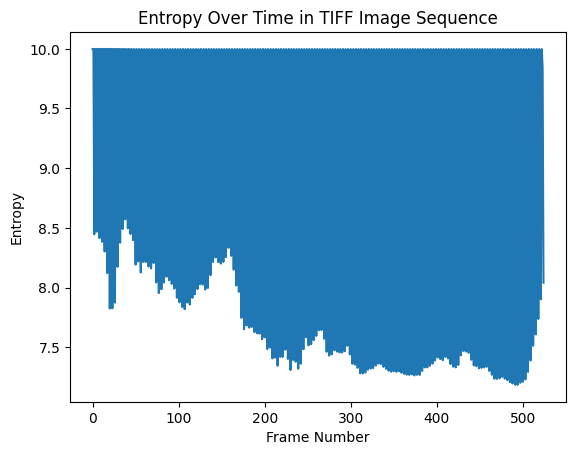

Theoretical Maximum Entropy: 10.0


In [32]:


entropy_over_time = []

for frame in cy5_frames:
    # Convert to grayscale if the image is in color
    if len(frame.shape) == 3:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    else:
        gray_frame = frame

    entropy = calculate_grid_entropy(gray_frame)
    entropy_over_time.append(entropy)

# Plotting the entropy over time
plt.plot(range(len(frames)), entropy_over_time)
plt.xlabel('Frame Number')
plt.ylabel('Entropy')
plt.title('Entropy Over Time in TIFF Image Sequence')
plt.show()

# Theoretical maximum entropy
max_theoretical_entropy = np.log2(32*32)  # For 400 cells
print(f"Theoretical Maximum Entropy: {max_theoretical_entropy}")


In [ ]:
cap = cv2.VideoCapture(video_path)

entropy_over_time = []
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale if your video is in color
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    entropy = calculate_grid_entropy(gray_frame)
    entropy_over_time.append(entropy)
    frame_count += 1

cap.release()

# Plotting the entropy over time
plt.plot(range(frame_count), entropy_over_time)
plt.xlabel('Frame Number')
plt.ylabel('Entropy')
plt.title('Entropy Over Time in Video')
plt.show()

# Compare with theoretical maximum entropy
max_theoretical_entropy = np.log2(400)  # For 400 cells
print(f"Theoretical Maximum Entropy: {max_theoretical_entropy}")

In [34]:
len(cy5_frames[1])

2048

Frame([[220, 252, 227, ..., 235, 211, 231],
       [264, 246, 273, ..., 228, 222, 266],
       [238, 250, 248, ..., 251, 247, 278],
       ...,
       [248, 203, 232, ..., 286, 256, 259],
       [208, 210, 212, ..., 258, 303, 235],
       [213, 196, 200, ..., 265, 291, 274]], dtype=uint16)
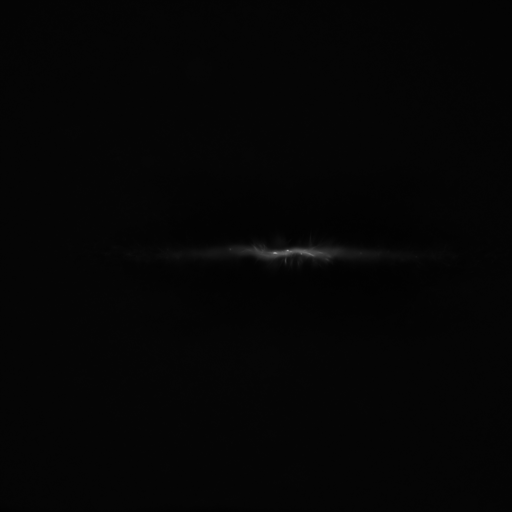

In [40]:
cy5_frames[100]

In [37]:
entropy = calculate_grid_entropy(cy5_frames[1])
entropy

9.998970452661613

In [52]:
entropy = calculate_grid_entropy(cy5_frames[517])
entropy

9.84199803089695

Frame([[229, 242, 263, ..., 255, 232, 228],
       [243, 254, 284, ..., 217, 259, 249],
       [280, 232, 218, ..., 235, 296, 298],
       ...,
       [215, 184, 185, ..., 271, 295, 286],
       [223, 197, 228, ..., 310, 282, 262],
       [183, 218, 189, ..., 298, 264, 247]], dtype=uint16)
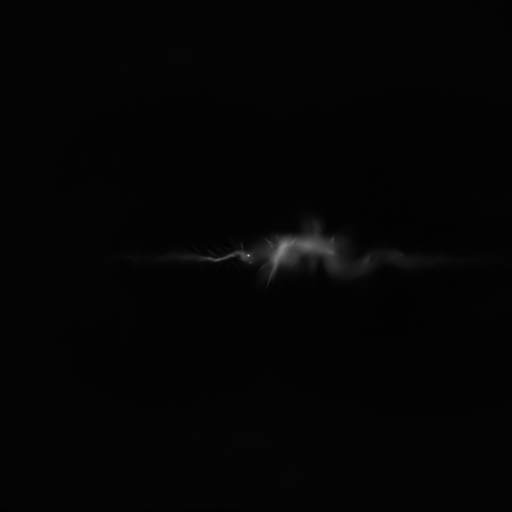

In [51]:
cy5_frames[517]

In [54]:
pip install Pillow


/bin/bash: /home/shichenliu/anaconda3/envs/active_matter/lib/python3.10/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [63]:
from PIL import Image


In [64]:
start = '/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_2/stokes/1120/mid_pH_test_125min_1/Pos2/img_000000000_Cy5_000.tif'

In [67]:
end = '/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_2/stokes/1120/mid_pH_test_125min_1/Pos2/img_000000174_Cy5_000.tif'

In [68]:
start_image = Image.open(start)
end_image = Image.open(end)

In [79]:
start_image_np = np.array(start_image)
end_image_np = np.array(end_image)


In [88]:
flattened_data = end_image_np.flatten()


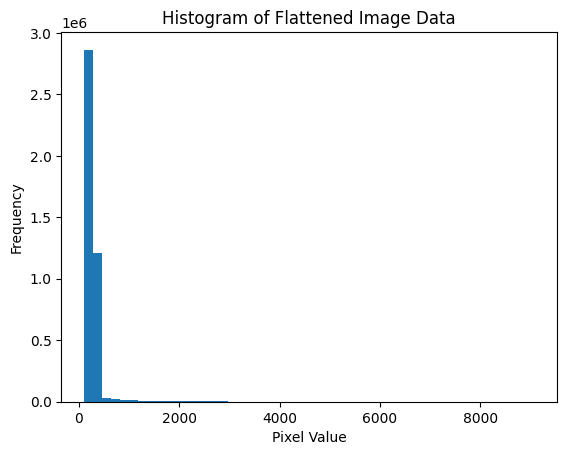

In [89]:
plt.hist(flattened_data, bins=50)  # Adjust the number of bins as needed
plt.title('Histogram of Flattened Image Data')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [93]:
min(flattened_data)

101

In [84]:
dataframe = pd.DataFrame(end_image_np)

In [85]:
column = dataframe.apply(tuple, axis=1)

In [87]:
column

0       (218, 236, 256, 278, 243, 240, 267, 258, 276, ...
1       (243, 282, 289, 255, 266, 305, 254, 250, 262, ...
2       (245, 251, 274, 241, 257, 263, 257, 260, 256, ...
3       (240, 243, 231, 276, 216, 270, 267, 232, 256, ...
4       (233, 279, 258, 255, 267, 285, 225, 271, 251, ...
                              ...                        
2043    (218, 205, 233, 245, 219, 207, 217, 242, 191, ...
2044    (214, 207, 217, 212, 211, 199, 207, 210, 219, ...
2045    (207, 173, 232, 201, 262, 221, 244, 205, 249, ...
2046    (192, 248, 204, 225, 219, 237, 226, 233, 181, ...
2047    (200, 235, 215, 184, 211, 205, 222, 232, 209, ...
Length: 2048, dtype: object

ValueError: setting an array element with a sequence.

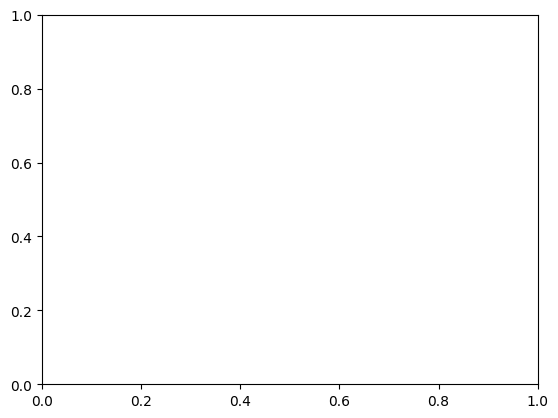

In [86]:
plt.plot(column)

In [78]:
entropy = calculate_grid_entropy(start_image_np)
entropy

9.998970452661613

In [83]:
entropy = calculate_grid_entropy(end_image_np)
entropy

9.840949277636003